<h3>Load dữ liệu và biến đổi dữ liệu</h3>

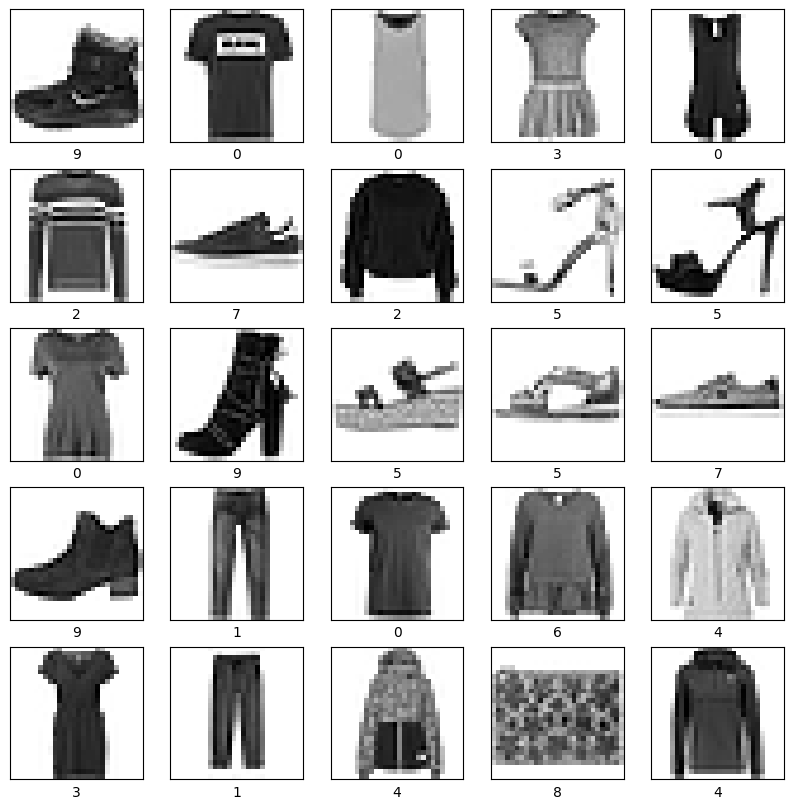

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dữ liệu Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, val_images = train_images[:50000], train_images[50000:]
train_labels, val_labels = train_labels[:50000], train_labels[50000:]

# Chuẩn hóa dữ liệu (Normalization)
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

# In ra hình ảnh mẫu và nhãn
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

<h2>1. LeNet</h2>

<h3>Xây dựng mô hình</h3>

Theo đúng mô hình LeNet5 mà Yan LeCun xây dựng, mô hình sẽ gồm có 7 tầng trong đó có 2 khối tích chập (mỗi khối gồm 1 tầng tích chập và 1 tầng pool), 1 khối kết nối đầy đủ (gồm có 3 tầng với 120, 84 và 10 neural). Khối tích chập đầu tiên với tầng tích chập có filter 5x5x6 sử dụng hàm kích hoạt sigmoid, khối tích chập thứ 2 với tầng tích chập có filter 5x5x16 sử dụng sigmoid. Mặc dù ReLu tốt hơn nhưng thời kỳ LeCun chưa phát hiện ra ReLu nên vẫn dùng sigmoid. Các tầng pooling đều có kích thước 2x2 và dùng averagePooling (maxPooling tốt hơn nhưng thời kỳ đó cũng chưa được phát hiện).

<img src="https://nguyentuanhung.wordpress.com/wp-content/uploads/2022/09/image-32.png">

In [5]:
from tensorflow.keras.utils import to_categorical

# Reshape để dữ liệu đầu vào phù hợp với mạng LeNet5
x_train = train_images.reshape(-1, 28, 28, 1)
x_val = val_images.reshape(-1, 28, 28, 1)
x_test = test_images.reshape(-1, 28, 28, 1)

# Chuyển đổi nhãn thành dạng one-hot
y_train = to_categorical(train_labels, 10)
y_val = to_categorical(val_labels, 10)
y_test = to_categorical(test_labels, 10)

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='sigmoid', input_shape=(28, 28, 1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='sigmoid'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(120, activation='sigmoid'))
model.add(layers.Dense(84, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Tóm tắt mô hình
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_6 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_7 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

<h3>Huấn luyện mô hình</h3>

In [10]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1563/1563 [==============================] - 25s 15ms/step - loss: 1.1728 - accuracy: 0.5630 - val_loss: 0.7493 - val_accuracy: 0.7178
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6764 - accuracy: 0.7386 - val_loss: 0.6159 - val_accuracy: 0.7660
Epoch 3/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.5817 - accuracy: 0.7752 - val_loss: 0.5586 - val_accuracy: 0.7874
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.5273 - accuracy: 0.7964 - val_loss: 0.5022 - val_accuracy: 0.8092
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.4922 - accuracy: 0.8115 - val_loss: 0.4851 - val_accuracy: 0.8209
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.4661 - accuracy: 0.8220 - val_loss: 0.4631 - val_accuracy: 0.8243
Epoch 7/10
1563/1563 [==============================] - 16s 11ms/step - loss: 0.4447 - accuracy: 0.8319 - val_loss: 0.4391 -

<h3>Đánh giá mô hình</h3>

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4070 - accuracy: 0.8507 - 1s/epoch - 4ms/step

Test accuracy: 0.8507000207901001


<h2>2. AlexNet</h2>

AlexNet có tám tầng gồm: năm tầng tích chập, hai tầng ẩn kết nối đầy đủ, và một tầng đầu ra kết nối đầy đủ. Trong tầng thứ nhất của AlexNet, kích thước cửa sổ tích chập là 11×11. Vì hầu hết các ảnh trong ImageNet đều có chiều cao và chiều rộng lớn gấp hơn mười lần so với các ảnh trong MNIST, các vật thể trong dữ liệu ImageNet thường có xu hướng chiếm nhiều điểm ảnh hơn. Do đó, ta cần sử dụng một cửa sổ tích chập lớn hơn để xác định được các vật thể này. Kích thước cửa sổ tích chập trong tầng thứ hai được giảm xuống còn  5×5 và sau đó là 3×3. Ngoài ra, theo sau các tầng chập thứ nhất, thứ hai và thứ năm là các tầng gộp cực đại với kích thước cửa sổ là 3×3 và sải bước bằng 2.                                                                         

Thứ hai, AlexNet đã thay hàm kích hoạt sigmoid bằng hàm kích hoạt ReLU đơn giản hơn. Một mặt là giảm việc tính toán, bởi ReLu không có phép lũy thừa như trong hàm kích hoạt sigmoid. Mặt khác, hàm kích hoạt ReLU giúp cho việc huấn luyện mô hình trở nên dễ dàng hơn khi sử dụng các phương thức khởi tạo tham số khác nhau. Điều này là do khi đầu ra của hàm kích hoạt sigmoid rất gần với 0 hoặc 1 thì gradient sẽ gần như bằng 0, vì vậy khiến cho lan truyền ngược không thể tiếp tục cập nhật một số tham số mô hình. Ngược lại, gradient của hàm kích hoạt ReLU trong khoảng dương luôn bằng 1. Do đó, nếu các tham số mô hình không được khởi tạo đúng cách thì hàm sigmoid có thể có gradient gần bằng 0 trong khoảng dương, dẫn đến việc mô hình không được huấn luyện một cách hiệu quả. 

<img src="https://learnopencv.com/wp-content/uploads/2018/05/AlexNet-1.png">

<h3>Xây dựng mô hình</h3>

In [12]:
from tensorflow.keras.utils import to_categorical

# Reshape để dữ liệu đầu vào phù hợp với mạng LeNet5
x_train = train_images.reshape(-1, 28, 28, 1)
x_val = val_images.reshape(-1, 28, 28, 1)
x_test = test_images.reshape(-1, 28, 28, 1)

# Chuyển đổi nhãn thành dạng one-hot
y_train = to_categorical(train_labels, 10)
y_val = to_categorical(val_labels, 10)
y_test = to_categorical(test_labels, 10)

In [14]:
model = models.Sequential()

# 1st Convolutional Layer
model.add(layers.Conv2D(filters=96, input_shape=(28, 28, 1), kernel_size=(11, 11), strides=(4, 4), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# 2nd Convolutional Layer
model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# 3rd Convolutional Layer
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))

# 4th Convolutional Layer
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))

# 5th Convolutional Layer
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# Flatten the layers
model.add(layers.Flatten())

# 1st Fully Connected Layer
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

# 2nd Fully Connected Layer
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

# 3rd Fully Connected Layer
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dropout(0.5))

# Output Layer
model.add(layers.Dense(10, activation='softmax'))

# Biên dịch mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In ra tóm tắt mô hình
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 7, 7, 96)          11712     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 96)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 256)         614656    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 2, 2, 384)         885120    
                                                                 
 conv2d_13 (Conv2D)          (None, 2, 2, 384)        

<h3>Huấn luyện mô hình</h3>

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

<h3>Đánh giá mô hình</h3>

In [ ]:
loaded_model = tf.keras.models.load_model('AlexNet.h5')

result = loaded_model.evaluate(x_test, y_test)
print(result)


<h2>3. VGG-16</h2>

Ý tưởng sử dụng các khối lần đầu xuất hiện trong mạng VGG, được đặt theo tên của nhóm VGG thuộc Đại học Oxford. Tức là VGG sẽ gồm nhiều khối tích chập giống nhau lặp lại. 

Mạng VGG gốc có 5 khối tích chập, trong đó hai khối đầu tiên bao gồm một tầng tích chập ở mỗi khối, ba khối còn lại chứa hai tầng tích chập ở mỗi khối. Khối đầu tiên có 64 kênh đầu ra, mỗi khối tiếp theo nhân đôi số kênh đầu ra cho tới khi đạt giá trị 512 . Vì mạng này sử dụng    tầng tích chập à  t  tầng kết nối đầy đủ nên nó thường được gọi là VGG

Mạng VGG-16 có 5 khối tích chập, trong đó hai khối đầu tiên bao gồm 2 tầng tích chập ở mỗi khối, ba khối còn lại chứa 3 tầng tích chập ở mỗi khối. Tất cả các lớp tích chập đều sử dụng các filter 3x3. Khối đầu tiên có 64 kênh đầu ra, mỗi khối tiếp theo nhân đôi số kênh đầu ra cho tới khi đạt giá trị 512. Vì mạng này sử dụng 2x2+3x3=13 tầng tích chập và 3 tầng kết nối đầy đủ nên nó thường được gọi là VGG-16.

Bắt đầu từ VGG-16, một hình mẫu chung cho các mạng CNN trong các tác vụ học có giám sát trong xử lý ảnh đã bắt đầu hình thành đó là các mạng trở nên sâu hơn và sử dụng các block dạng { Conv2D*n + Max Pooling }.11.

<img src="https://learnopencv.com/wp-content/uploads/2023/01/Convolutional-Neural-Networks.png">

<h3>Xây dựng mô hình</h3>

In [3]:
model = models.Sequential()

# Block 1
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 2
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 3 - 5
for i in range(3,6):
  model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Biên dịch mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In ra tóm tắt mô hình
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                

<h2>4. GoogleNet</h2>

Vào năm 2014, bài báo khoa học đã giành chiến thắng ở cuộc thi ImageNet, bằng việc đề xuất một cấu trúc kết hợp những điểm mạnh của mô hình NiN (mạng trong mạng) và mô hình chứa các khối lặp lại (ý tưởng VGG). Bài báo này tập trung giải quyết câu hỏi: kích thước nào của bộ lọc tích chập là tốt nhất. Suy cho cùng, các mạng phổ biến trước đây chọn kích thước bộ lọc từ nhỏ như 1×1  tới lớn như  11×1
 . Một góc nhìn sâu sắc trong bài báo này là đôi khi việc kết hợp các bộ lọc có kích thước khác nhau có thể sẽ hiệu qu

Khối tích chập cơ bản trong mô hình GoogLeNet được gọi là Inception. Dưới đây là hình ảnh mô tả của khối Inception.ả.

<img src="https://d2l.aivivn.com/_images/inception.svg" >

Như mô tả ở hình trên, khối inception bao gồm bốn nhánh song song với nhau. Ba nhánh đầu sử dụng các tầng tích chập với kích thước cửa sổ trượt lần lượt là 1x1, 3x3, 5x5 để trích xuất thông tin từ các vùng không gian có kích thước khác nhau. Hai nhánh giữa thực hiện phép tích chập 1x1 trên dữ liệu đầu vào để giảm số kênh đầu vào, từ đó giảm độ phức tạp của mô hình. Nhánh thứ tư sử dụng một tầng gộp cực đại kích thước 3x3 theo sau là một tầng tích chập 1x1 để thay đổi số lượng kênh. Cả bốn nhánh sử dụng phần đệm phù hợp để đầu vào và đầu ra của khối có cùng chiều cao và chiều rộng. Cuối cùng, các đầu ra của mỗi nhánh sẽ được nối lại theo chiều kênh để tạo thành đầu ra của cả khối. Các tham số thường được tinh chỉnh của khối Inception là số lượng kênh đầu ra mỗi tầng.

Mô hình GoogLeNet sử dụng tổng cộng 9 khối inception và tầng gộp trung bình toàn cục xếp chồng lên nhau. Phép gộp cực đại giữa các khối inception có tác dụng làm giảm kích thước chiều. Phần đầu tiên của GoogleNet giống AlexNet và LeNet, có các khối xếp chồng lên nhau kế thừa từ thiết kế của VGG và phép gộp trung bình toàn cục giúp tránh phải sử dụng nhiều tầng kết nối đầy đủ liên tiếp ở cuối.

<img src="https://d2l.aivivn.com/_images/inception-full.svg" style="margin-left:400px">

<h3>Xây dựng mô hình</h3>

In [10]:
# xây dựng khối Inception
def inception_module(x, filters):
    # 1x1 Convolution
    conv1x1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)

    # 3x3 Convolution
    conv3x3 = layers.Conv2D(filters[1], (3, 3), padding='same', activation='relu')(x)

    # 5x5 Convolution
    conv5x5 = layers.Conv2D(filters[2], (5, 5), padding='same', activation='relu')(x)

    # MaxPooling
    max_pool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    max_pool_conv = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(max_pool)

    # Concatenate
    output = layers.concatenate([conv1x1, conv3x3, conv5x5, max_pool_conv], axis=-1)
    return output

In [12]:
# Xây dựng mô hình
def google_net(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Stem layer
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception modules
    x = inception_module(x, [64, 96, 128, 16])
    x = inception_module(x, [128, 128, 192, 32])
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_module(x, [192, 96, 208, 16])
    x = inception_module(x, [160, 112, 224, 24])
    x = inception_module(x, [128, 128, 256, 24])
    x = inception_module(x, [112, 144, 288, 32])
    x = inception_module(x, [256, 160, 320, 32])
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_module(x, [256, 160, 320, 32])
    x = inception_module(x, [384, 192, 384, 48])

    # Global Average Pooling
    x = layers.AveragePooling2D((2, 2))(x)
    x = layers.Flatten()(x)

    # Fully connected layer
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Khởi tạo và biên dịch mô hình
model = google_net(input_shape=(32, 32, 3), num_classes=10)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In ra tóm tắt mô hình
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_50 (Conv2D)          (None, 16, 16, 64)           9472      ['input_3[0][0]']             
                                                                                                  
 max_pooling2d_17 (MaxPooli  (None, 8, 8, 64)             0         ['conv2d_50[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 max_pooling2d_18 (MaxPooli  (None, 8, 8, 64)             0         ['max_pooling2d_17[0][0]']

<h2>5. ResNet</h2>

<h3>Batch Normalization (BN)</h3>

Batch-Normalization (BN) là phương pháp khiến cho việc huấn luyện mạng nơ-ron sâu (Deep Nearon Network, DNN) nhanh và ổn định hơn.
Nó bao gồm chuẩn hoá các vectors của lớp ẩn (hidden layers) sử dụng trung bình và phương sai (mean và variance) của batch hiện tại. Bước chuẩn hoá có thể được áp dụng ngay trước hoặc ngay sau một hàm phi tuyến tín

Khi huấn luyện các mạng thường gặp như Perceptron đa tầng hay CNN, các giá trị kích hoạt ở các tầng trung gian có thể nhận các giá trị với mức độ biến thiên lớn - dọc theo các tầng từ đầu vào đến đầu ra, qua các nút ở cùng một tầng, và theo thời gian do việc cập nhật giá trị tham số. Những nhà phát minh kỹ thuật chuẩn hoá theo batch cho rằng sự thay đổi trong phân phối của những giá trị kích hoạt có thể cản trở sự hội tụ của mạng. Dễ thấy rằng nếu một tầng có các giá trị kích hoạt lớn gấp 100 lần so với các tầng khác, thì cần phải có các điều chỉnh bổ trợ trong tốc độ học. 
Mạng nhiều tầng có độ phức tạp cao và dễ gặp vấn đề quá khớp. Điều này cũng đồng nghĩa rằng kỹ thuật điều chuẩn càng trở nên quan trọng.h.

Chuẩn hoá theo batch được áp dụng cho từng tầng riêng lẻ (hoặc có thể cho tất cả các tầng) và hoạt động như sau: Trong mỗi vòng lặp huấn luyện, tại mỗi tầng, đầu tiên tính giá trị kích hoạt như thường lệ. Sau đó chuẩn hóa những giá trị kích hoạt của mỗi nút bằng việc trừ đi giá trị trung bình và chia cho độ lệch chuẩn. Cả hai đại lượng này được ước tính dựa trên số liệu thống kê của minibatch hiện tại. Chính vì chuẩn hóa dựa trên các số liệu thống kê của batch nên kỹ thuật này có tên gọi chuẩn hoá theo batch.

Khi áp dụng BN với những minibatch có kích thước 1, mô hình sẽ không học được gì. Vì sau khi trừ đi giá trị trung bình, mỗi nút ẩn sẽ nhận giá trị 0! Dễ dàng suy luận ra là BN chỉ hoạt động hiệu quả và ổn định với kích thước minibatch đủ lớn. Cần ghi nhớ rằng, khi áp dụng BN là lựa chọn kích thước minibatch quan trọng hơn so với trường hợp không áp dụng BN.

BN thực hiện chuyển đổi các giá trị trước kích hoạt tại tầng x theo công thức:
                        BN(x) = 𝛾 ⊙ (x − 𝜇) / σ + 𝛽
Ở đây, 𝜇
 là giá trị trung bình và 
  là độ lệch chuẩn của các mẫu trong minibatch. Sau khi áp dụng BN, những giá trị kích hoạt của minibatch có giá trị trung bình bằng không và phương sai đơn vị. Vì việc lựa chọn phương sai đơn vị (so với một giá trị đặc biệt khác) là tuỳ ý, nên chúng ta thường thêm vào từng cặp tham số tương ứng là hệ số tỷ l𝛾 
  và độ ch 𝛽 (𝛾 giúp điều chỉnh phương sai phân phối, 
𝛽 giúp điều chỉnh bias, dịch chuyển phân phối sang trái haphải) β
 .

Chuẩn hóa theo batch sẽ có sự khác biệt đối với tầng kết nối đầy đủ và tầng tích chập.

--> Với tầng kết nối đầy đủ: 
Khi áp dụng BN cho tầng kết nối đầy đủ, ta thường chèn BN sau bước biến đổi affine và trước hàm kích hoạt phi tuyến. Kí hiệu đầu vào của tầng là x   hàm biến đổi tuyến tính là fθ(⋅   (với trọng số l  
 ), hàm kích hoạt à  ϕ)
 , và phép tính BN BN(  B) γ
  với tha   β à  γ
 , chúng ta sẽ biểu diễn việc tính toán tầng kết nối ầ ủ  h
  khi chèn lớp BN vào 
                        h = ϕ(BN(β,γ)(fθ(x)))
Nhắc lại rằng giá trị trung bình và phương sai sẽ được tính toán trên chính minibatch B  mà sẽ được biến đổi. Cũng cần lưu ý rằng hệ số tỷ lệ  v và  ộ chệc  
  là những tham số cần được học cùng với bộ tham số quen th cθ

--> Với tầng tích chập
Tương tự với tầng tích chập, chúng ta áp dụng BN sau phép tích chập và trước hàm kích hoạt phi tuyến. Khi áp dụng phép tích chập cho đầu ra nhiều kênh, chúng ta cần thực hiện chuẩn hóa theo batch cho mỗi đầu ra của những kênh này, và mỗi kênh sẽ có riêng cho nó các tham số tỉ lệ và độ chệch, cả hai đều là các số vô hướng. Giả sử các minibatch có kích thước m , đầu ra cho mỗi kênh của phép tích chập có chiều cao    và chiều rộn 
 . Với tầng tích chập, ta sẽ thực hiện mỗi phép chuẩn hoá theo batch trn  m⋅ 
  phần tử trên từng kênh đầu ra cùng lúc. Vì thế trên từng kênh, ta sử dụng giá trị trên tất cả các vị trí không gian để tính trbình μμ^
  và phươngs σ^
  và sau đó dùng hai giá trị này để chuẩn hóa các giá trị tại mỗi vị trí không gian trên kênh đó.
 .như sau:

<h3>Mô tả về mạng ResNet</h3>

ResNet là kiến trúc được sử dụng phổ biến nhất ở thời điểm hiện tại. ResNet cũng là kiến trúc sớm nhất áp dụng batch normalization. Mặc dù là một mạng rất sâu khi có số lượng layer lên tới 152 nhưng nhờ áp dụng những kỹ thuật đặc biệt mà ta sẽ tìm hiểu bên dưới nên kích thước của ResNet50 chỉ khoảng 26 triệu tham số. Kiến trúc với ít tham số nhưng hiệu quả của ResNet đã mang lại chiến thắng trong cuộc thi ImageNet năm 2015.

Những kiến trúc trước đây thường cải tiến độ chính xác nhờ gia tăng chiều sâu của mạng CNN. Nhưng thực nghiệm cho thấy đến một ngưỡng độ sâu nào đó thì độ chính xác của mô hình sẽ bão hòa và thậm chí phản tác dụng và làm cho mô hình kém chính xác hơn. Khi đi qua quá nhiều tầng độ sâu có thể làm thông tin gốc bị mất đi thì các nhà nghiên cứu của Microsoft đã giải quyết vấn đề này trên ResNet bằng cách sử dụng kết nối tắ

ResNet-50 (Residual Network with 50 layers) là một kiến trúc mạng nơ-ron sâu được thiết kế để giải quyết vấn đề gradient biến mất trong quá trình huấn luyện các mạng rất sâu. ResNet-50 sử dụng các khối dư (residual blocks), trong đó đầu vào của một khối được cộng thêm với đầu ra của khối đó trước khi áp dụng hàm kích hoạt, giúp gradient chảy ngược qua mạng dễ dàng hơn.t.

<h4>Khối phần dư</h4>

Ký hiệu đầu vào là  x . Giả sử ánh xạ lý tưởng muốn học được là f(x , và được dùng làm đầu vào của hàm kích hoạt. Phần nằm trong viền nét đứt bên trái phải khớp trực tiếp với ánh ạ  f(
 . Điều này có thể không đơn giản nếu chúng ta không cần khối đó và muốn giữ lại đầu vx.
 . Khi đó, phần nằm trong viền nét đứt bên phải chỉ cần tham số hoá độ lệch khỏi giá rx
 , bởi vì ta đã tr  v ề  x(x)
 . Trên thực tế, ánh xạ phần dư thường dễ tối ưu hơn, vì chỉ cn đặt  x)=0
 . 

<img src = "https://d2l.aivivn.com/_images/residual-block.svg" style="margin-left: 300px">

ResNet có thiết kế tầng tích chập 3×3  giống VGG. Khối phần dư có hai tầng tích chập 3×
  với cùng số kênh đầu ra. Mỗi tầng tích chập được theo sau bởi một tầng chuẩn hóa theo batch và một hàm kích hoạt ReLU. Ta đưa đầu vào qua khối phần dư rồi cộng với chính nó trước hàm kích hoạt ReLU cuối cùngT Thiết kế này đòi hỏi đầu ra của hai tầng tích chập phải có cùng kích thước với đầu vào, để có thể cộng lại với nhau. Nếu muốn thay đổi số lượng kênh hoặc sải bước trong khối phần dư, cần thêm một tầng tích chp  1
  để thay đổi kích thước đầu vào tương ứng ở nhánh ngoới.

<img src = "https://d2l.aivivn.com/_images/resnet-block.svg" style="margin-left: 300px">

<h4>Kiến trúc của ResNet-50</h4>

<img src="https://vinbigdata.com/wp-content/uploads/2023/03/11rlrAL0ZhUorlQRbGKQxmQ.webp">

Như đã phân tích ở khối phần dư thì ResNet sẽ có các khối ConV (khối tích chập) tức cần sử dụng lớp tích chập 1x1 trước khi thực hiện cộng và khối Identity (khối xác định) thì không cần sử dụng Conv 1x1.

Kiến trúc tổng quan của mô hình ResNet được khái quát như sau:
--> Tầng đầu vào: Conv2D -> BatchNormalization -> Activation -> MaxPooling
--> Giai đoạn 1: Conv Block + 2 Identity Blocks
--> Giai đoạn 2: Conv Block + 3 Identity Blocks
--> Giai đoạn 3: Conv Block + 5 Identity Blocks
--> Giai đoạn 4: Conv Block + 2 Identity Blocks
--> Tầng đầu ra: Global Average Pooling -> Dense

<h3>Xây dựng mô hình</h3>

<h4>Xây dựng các khối</h4>

In [13]:
def identity_block(input_tensor, filters):
    f1, f2, f3 = filters
    
    x = layers.Conv2D(f1, (1, 1))(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(f2, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(f3, (1, 1))(x)
    x = layers.BatchNormalization()(x)
    
    x = layers.add([x, input_tensor])
    x = layers.Activation('relu')(x)
    return x

def conv_block(input_tensor, filters, strides=(2, 2)):
    f1, f2, f3 = filters
    
    x = layers.Conv2D(f1, (1, 1), strides=strides)(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(f2, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(f3, (1, 1))(x)
    x = layers.BatchNormalization()(x)
    
    shortcut = layers.Conv2D(f3, (1, 1), strides=strides)(input_tensor)
    shortcut = layers.BatchNormalization()(shortcut)
    
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

<h4>Xây dựng mô hình</h4>

In [15]:
input_shape = (32, 32, 3)
inputs = layers.Input(shape=input_shape)

x = layers.Conv2D(64, (7, 7), padding='same', strides=(1, 1))(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Stage 1
x = conv_block(x, [64, 64, 256], strides=(1, 1))
x = identity_block(x, [64, 64, 256])
x = identity_block(x, [64, 64, 256])

# Stage 2
x = conv_block(x, [128, 128, 512])
x = identity_block(x, [128, 128, 512])
x = identity_block(x, [128, 128, 512])
x = identity_block(x, [128, 128, 512])

# Stage 3
x = conv_block(x, [256, 256, 1024])
x = identity_block(x, [256, 256, 1024])
x = identity_block(x, [256, 256, 1024])
x = identity_block(x, [256, 256, 1024])
x = identity_block(x, [256, 256, 1024])
x = identity_block(x, [256, 256, 1024])

# Stage 4
x = conv_block(x, [512, 512, 2048])
x = identity_block(x, [512, 512, 2048])
x = identity_block(x, [512, 512, 2048])

# Output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs, x)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_140 (Conv2D)         (None, 32, 32, 64)           9472      ['input_5[0][0]']             
                                                                                                  
 batch_normalization_53 (Ba  (None, 32, 32, 64)           256       ['conv2d_140[0][0]']          
 tchNormalization)                                                                                
                                                                                                  
 activation_49 (Activation)  (None, 32, 32, 64)           0         ['batch_normalization_53

<h2>6. DenseNet</h2>

DenseNet (Densely Connected Convolutional Networks) là một kiến trúc mạng nơ-ron sâu nổi bật trong lĩnh vực thị giác máy tính. Được giới thiệu bởi Gao Huang và các cộng sự vào năm 2017, DenseNet giúp giảm bớt vấn đề gradient biến mất, tăng khả năng tái sử dụng tính năng và cải thiện hiệu quả huấn luyện.

Ở ResNet chúng ta phân tách hàm số thành một hàm xác định và một hàm phi tuyến: f(x) = x + g(x).

Công thức khai triển Taylor tại x = 0:<br></br>
                f(x) = f(0) + f'(x).x + f''(x).x^2/2! + ........... + f^(n)(x).x^n/n! + O(x^n)

Ta có thể thấy công thức của ResNet cũng gần tương tự như khai triển taylor tại đạo hàm bậc nhất, g(x) tương ứng với thành phần số dư. Khai triển Taylor sẽ càng chuẩn xác nếu chúng ta phân rã được số dư thành nhiều đạo hàm bậc cao hơn. 
Ý tưởng của DenseNet cũng như vậy, chúng ta sẽ sử dụng một mạng lưới các kết nối tắt dày đặc để liên kết các khối với nhau.

<div style="display: flex;">
    <img src="https://d2l.aivivn.com/_images/densenet-block.svg" style="margin-left: 100px">
    <img src="https://d2l.aivivn.com/_images/densenet.svg" style="margin-left: 100px">
</div>

Từ đầu vào  ta sẽ áp dụng liên tiếp một chuỗi các ánh xạ liên tiếp với cấp độ phức tạp tăng dần<br></br>
    x → { x,f1(x),f2(x,f1(x)),f3(x,f1(x),f2(x,f1(x)),…}.

DenseNet sẽ khác so với ResNet đó là chúng ta không cộng trực tiếp x
 vàof(x)
 mà thay vào đó, các đầu ra của từng phép ánh xạ có cùng kích thước dài và rộng sẽ được concatenate với nhau thành một khối theo chiều sâu. Sau đó để giảm chiều dữ liệu chúng ta áp dụng tầng chuyển tiếp (translation layer). Tầng này là kết hợp của một layer tích chập giúp giảm độ sâu và một max pooling giúp giảm kích thước dài và rộni::

<h3>Kiến trúc của mô hình DenseNet-121</h3>

DenseNet được xây dựng từ các khối (blocks) chính như sau:

--> Dense Block: Trong một Dense Block, mỗi lớp (layer) nhận đầu vào từ tất cả các lớp trước đó, và đầu ra của nó được chuyển đến tất cả các lớp sau. Điều này có nghĩa là có kết nối trực tiếp giữa mọi cặp lớp trong cùng một khối.

--> Transition Layer: Để kiểm soát kích thước của mạng và giảm số lượng tham số, Transition Layer được sử dụng giữa các Dense Blocks. Transition Layer bao gồm một lớp Conv2D và một lớp AveragePooling2D.

Quna sát mô hình DenseNet-121 dưới đây:

<img src="https://www.researchgate.net/publication/331364877/figure/fig4/AS:741856270901253@1553883726942/Left-DenseNet121-architecture-Right-Dense-block-conv-block-and-transition-layer_W640.jpg" style="margin-left: 200px">

<h3>Xây dựng mô hình</h3>

<h4>Xây dựng các khối cần thiết</h4>

<h5>Dense Block</h5>

In [1]:
def dense_block(x, blocks, growth_rate):
    for i in range(blocks):
        x = conv_block(x, growth_rate)
    return x

def conv_block(x, growth_rate):
    x1 = layers.BatchNormalization()(x)
    x1 = layers.Activation('relu')(x1)
    x1 = layers.Conv2D(4 * growth_rate, 1, use_bias=False)(x1)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Activation('relu')(x1)
    x1 = layers.Conv2D(growth_rate, 3, padding='same', use_bias=False)(x1)
    x = layers.Concatenate()([x, x1])
    return x

<h5>Transition Layer</h5>

In [2]:
def transition_layer(x, reduction):
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(int(x.shape[-1] * reduction), 1, use_bias=False)(x)
    x = layers.AveragePooling2D(2, strides=2)(x)
    return x

<h4>Xây dựng mô hình</h4>

In [6]:
def densenet_121(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    
    # Initial Conv Layer
    x = layers.Conv2D(64, 7, strides=2, padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)
    
    # Dense Block 1
    x = dense_block(x, 6, 32)
    x = transition_layer(x, 0.5)
    
    # Dense Block 2
    x = dense_block(x, 12, 32)
    x = transition_layer(x, 0.5)
    
    # Dense Block 3
    x = dense_block(x, 24, 32)
    x = transition_layer(x, 0.5)
    
    # Dense Block 4
    x = dense_block(x, 16, 32)
    
    # Output Layer
    x = layers.BatchNormalization()(x)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = models.Model(inputs, outputs)
    return model

# Khởi tạo mô hình
model = densenet_121((32, 32, 3), 10)

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In ra kiến trúc mô hình
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_120 (Conv2D)         (None, 16, 16, 64)           9408      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_121 (B  (None, 16, 16, 64)           256       ['conv2d_120[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_117 (Activation  (None, 16, 16, 64)           0         ['batch_normalization_12

<h2>7. Tổng kết</h2>

--> LeNet (1998): Là mạng đầu tiên áp dụng tích chập 2 chiều. 
--> 
AlexNet (2012): Làm mạng áp dụng CNN đầu tiên chiến thắng trong cuộc thi ImageNet. Phá vỡ lối mòn sử dụng các đặc trưng thủ công từ các thuật toán truyền thống như HOG, SHIFT, SURF thay cho các đặc trưng được huấn luyện trong các tác vụ học có giám sát của thị giác máy tính
.--> 
VGG-16 (2014): Hình thành một xu hướng cải thiện độ chính xác của các mạng học sâu thông qua gia tăng độ sâu của chúng
--> .
GoogleNet - InceptionV1 (2014): Kết hợp nhiều bộ lọc có kích thước khác biệt vào cùng một khối. Định hình kiến trúc khối cho các kiến trúc mạng CNN chuẩn sau nà
--> y.
ResNet-50 (2015): Sử dụng kết nối tắt để ánh xạ các đầu vào từ những layer trước đó tới những layer sau. Là kiến trúc mạng rất sâu nhưng có số tham số nhỏ hơn nhờ kế thừa những kỹ thuật từ GoogleN
--> et.
DenseNet (2016): Là bước phát triển tiếp theo cua ResNet khi kế thừa kiến trúc khối và phát triển kết nối tắt theo một mạng dày 
đặc.
Ngoài những kiến trúc tiêu biếu mang tính dấu mốc đã được mình liệt kê trên, vẫn còn những kiến trúc khác không nằm trong top đầu của cuộc thi ImageNet nhưng cũng được sử dụng rộng rãi như MobileNet, SqueezeNet, NasNet. Gần đây thì kiến trúc EfficientNet dựa trên việc tìm kiếm tối ưu trên không gian các tham số Depth, Width và Channel đã được google phát triển và tạo ra kết quả SOTA trên bộ dữ liệu ImageNet. 